In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [23]:
hourRegistrationData = pd.read_excel('hour_registration_data.xlsx', sheet_name='data')

In [24]:
# Clean up Columns

# Convert dates and times to appropriate data types
hourRegistrationData['Start'] = pd.to_datetime(hourRegistrationData['Start'])
hourRegistrationData['Stop'] = pd.to_datetime(hourRegistrationData['Stop'])
hourRegistrationData['Due Date'] = pd.to_datetime(hourRegistrationData['Due Date'])
hourRegistrationData['Start Date'] = pd.to_datetime(hourRegistrationData['Start Date'])
hourRegistrationData['Date Created'] = pd.to_datetime(hourRegistrationData['Date Created'])

# Convert 'Time Tracked' from milliseconds to hours
hourRegistrationData['Time Tracked Hours'] = hourRegistrationData['Time Tracked'] / (1000 * 60 * 60)  # Converts from ms to hours

In [25]:
# OPEN USER DATA
userData = pd.read_excel('users.xlsx', sheet_name='data')

In [26]:
# CALCULATE HOURLY COSTS
# We can make improve this logic, but we add that later. 
# Averages should be fine for now. 
userData['Hourly Cost'] = userData['Labor Cost per Month'] / (21*7.5) # Avg work days multiplied by 7.5 work hours
print(userData)

                      Username   User ID  Labor Cost per Month  Hourly Cost
0           Abdurrahman Lloren   5987060                 30000   190.476190
1               Adelaine Comar   5856590                 25000   158.730159
2               Alleja Alecses  61709934                 28000   177.777778
3                         Anna   7837583                 30000   190.476190
4                 Axell Gaceta  61741467                 35000   222.222222
5                Celeste Costa  55776903                 30000   190.476190
6             Edeline Carrasco  55456878                 25000   158.730159
7               Elvie Barangan  32195122                 28000   177.777778
8         Eric Earl Los BaÃ±os  32237042                 30000   190.476190
9           Estephanie Aguilar  43780421                 35000   222.222222
10               Garie Cujardo   5856591                 30000   190.476190
11     Garrick Dean T. Lucasan  32237054                 25000   158.730159
12          

In [29]:
# MERGE TWO DATA SOURCES
# We merge the two dataframes on ID
taskCostData = pd.merge(hourRegistrationData, userData[['User ID', 'Hourly Cost']], on='User ID', how='inner')
taskCostData['Cost per Task'] = taskCostData['Hourly Cost'] * taskCostData['Time Tracked Hours']
taskCostData['Cost per Task'] = taskCostData['Cost per Task'].round(2)
taskCostData.to_excel('merged.xlsx', index=False)

   PROJECT CATEGORIES (FOR FINANCE)  Cost per Task
9           ARIA human anatomy 3D-D      232181.30
13             Administrative SES-S      217426.64
40              Leave/Holiday SES-S      204770.62
52        Video production AIA XD-D       87528.72
18                Back-office ENI-S       64032.02
..                              ...            ...
39          Leave / Holiday SES - S         158.73
19   Back-office ExpertCollege EC-S          92.06
11          Administration ALL XD-S          79.37
63         Website Xpedite All XD-S          79.37
28         Finance ExpertFolio EF-S          37.17

[64 rows x 2 columns]


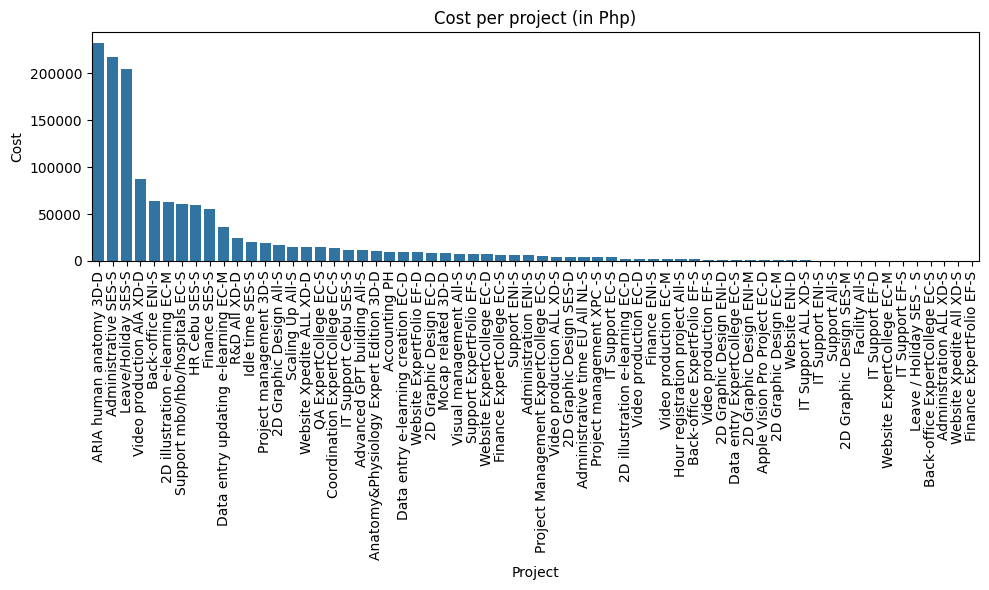

In [39]:
# OVERALL PROJECT COST
# We want to calculate the cost of each project as a whole
projectCosts = taskCostData.groupby('PROJECT CATEGORIES (FOR FINANCE)')
projectCosts = projectCosts['Cost per Task'].sum()
projectCosts = projectCosts.reset_index()
projectCosts = projectCosts.sort_values(by='Cost per Task', ascending=False)

print(projectCosts)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=projectCosts, x='PROJECT CATEGORIES (FOR FINANCE)', y='Cost per Task')
plt.xticks(rotation=90)
plt.title('Cost per project (in Php)')
plt.ylabel('Cost')
plt.xlabel('Project')
plt.tight_layout()
plt.show()

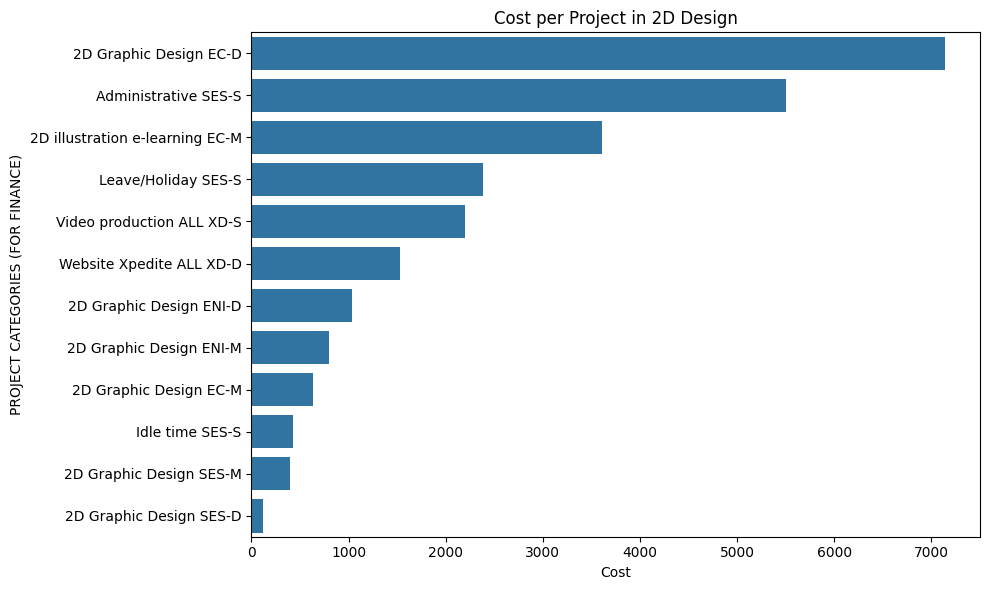

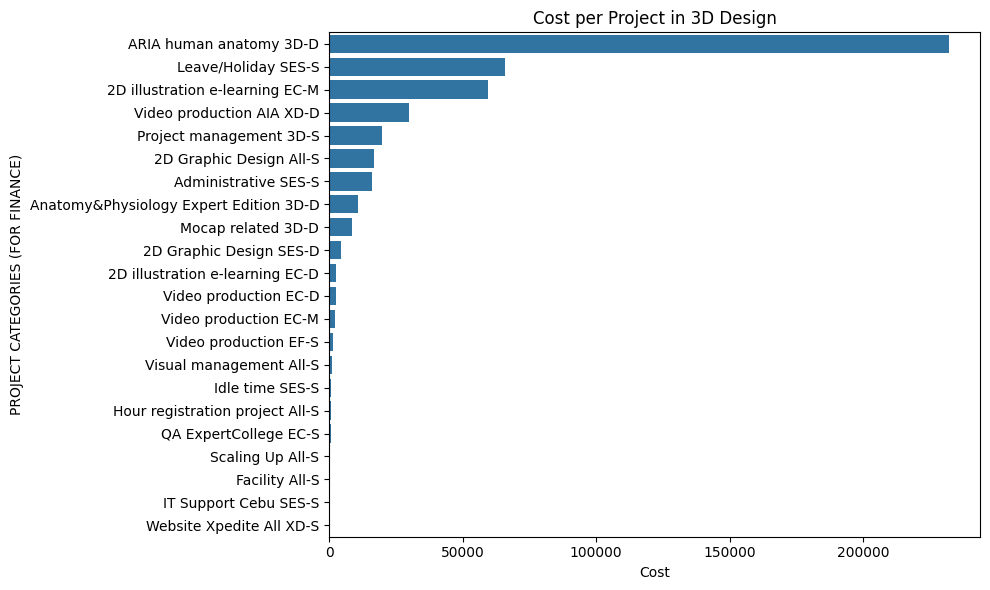

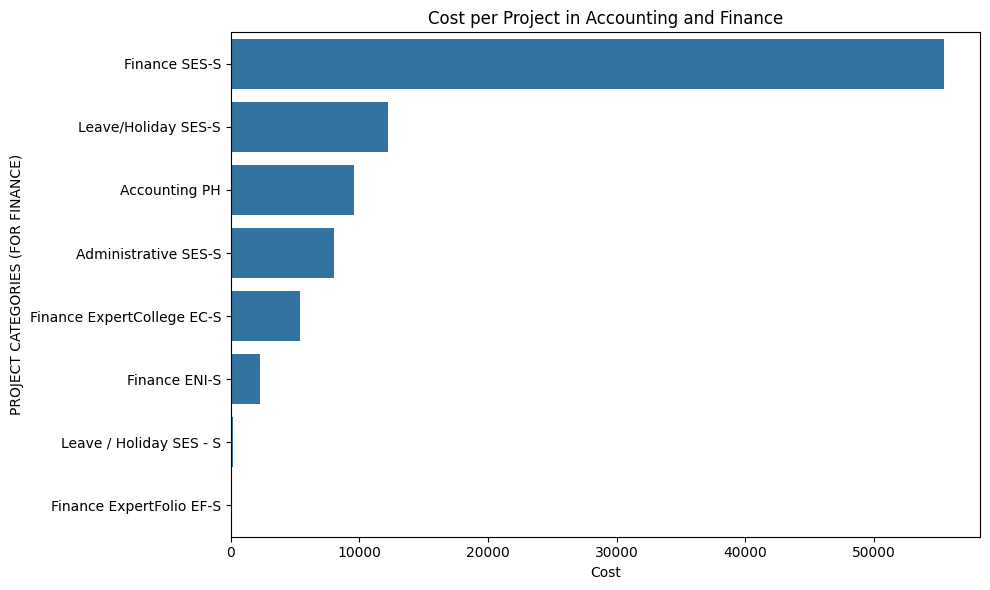

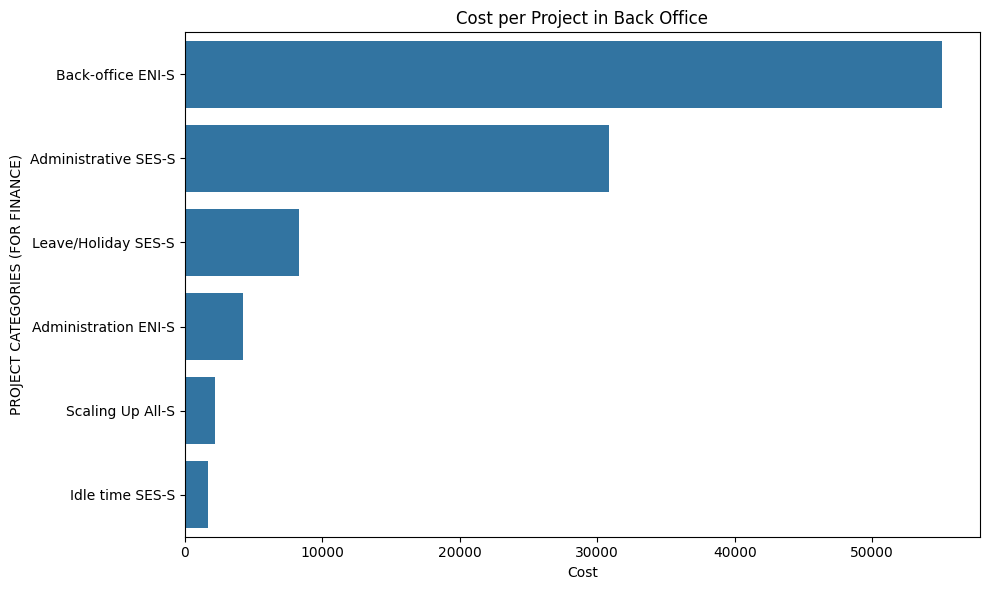

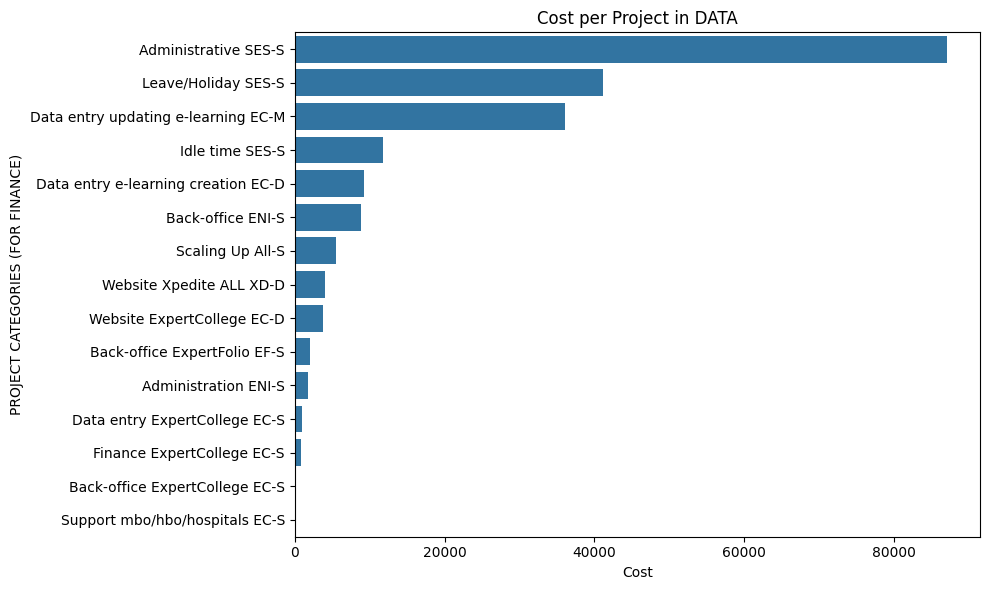

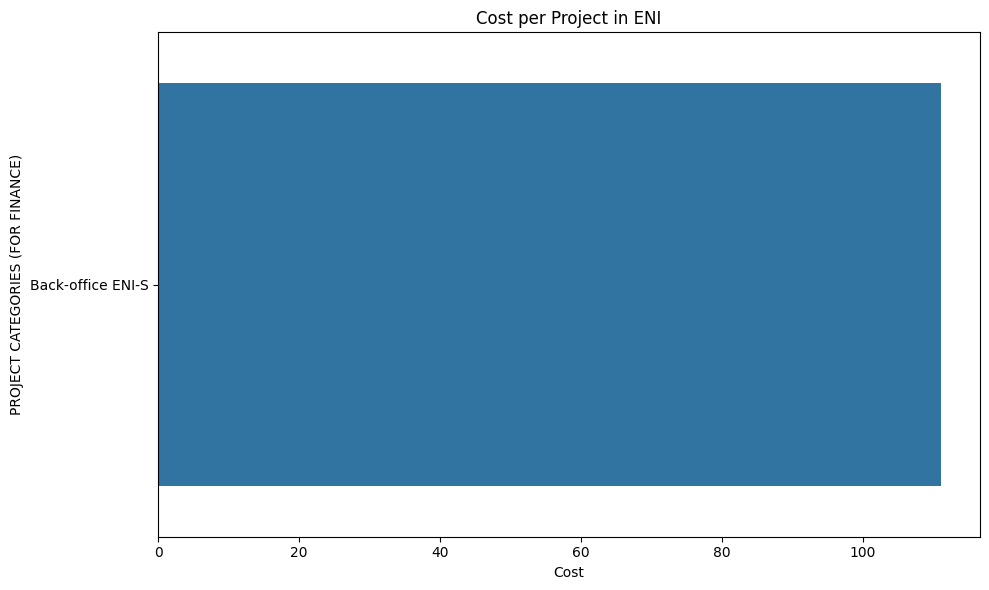

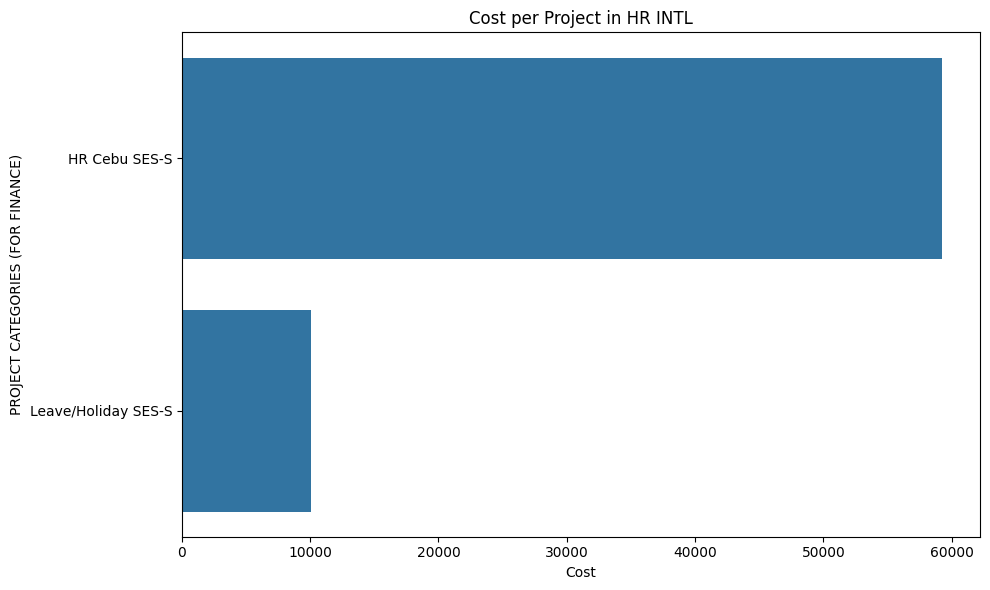

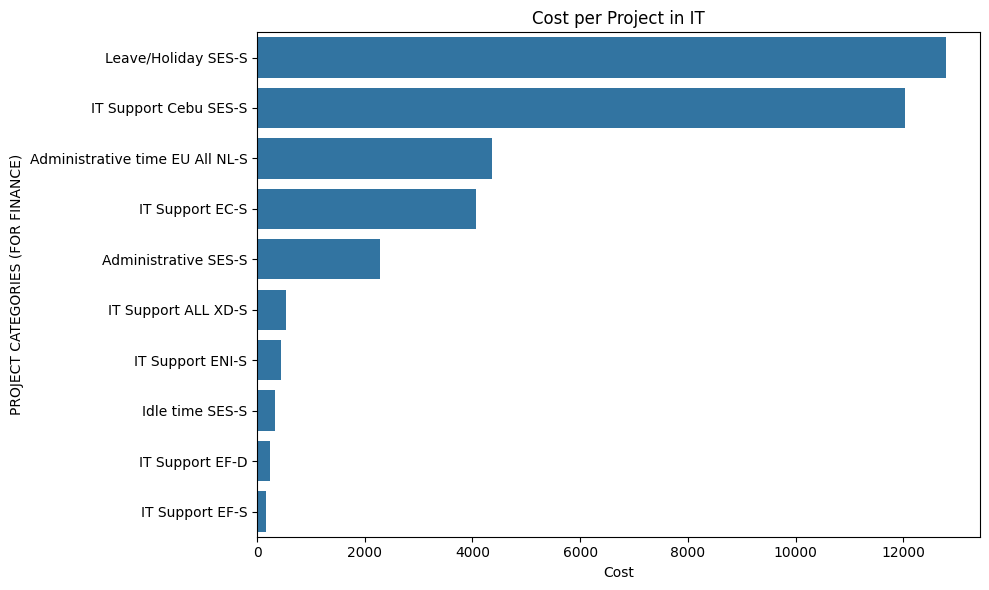

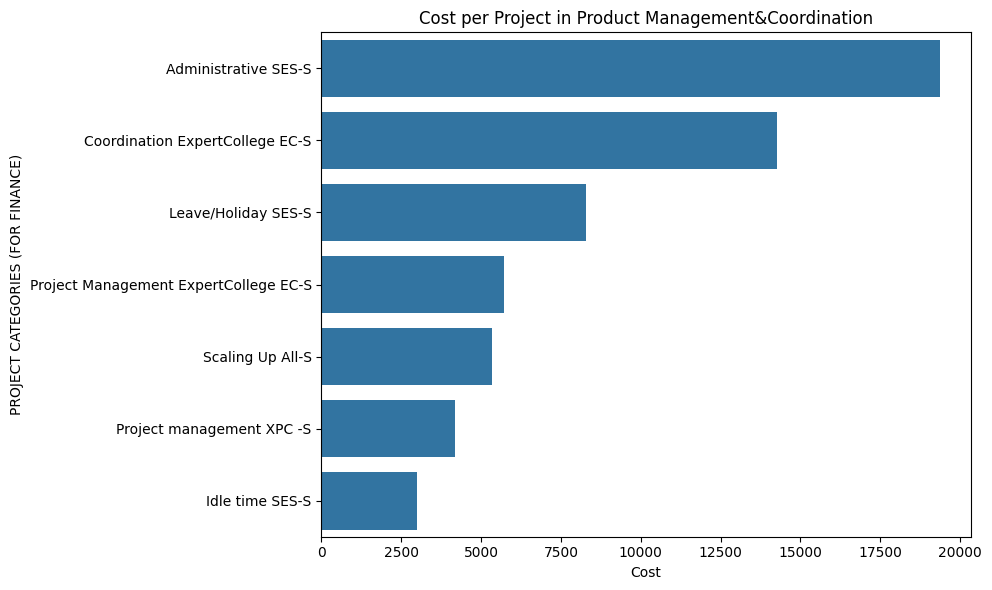

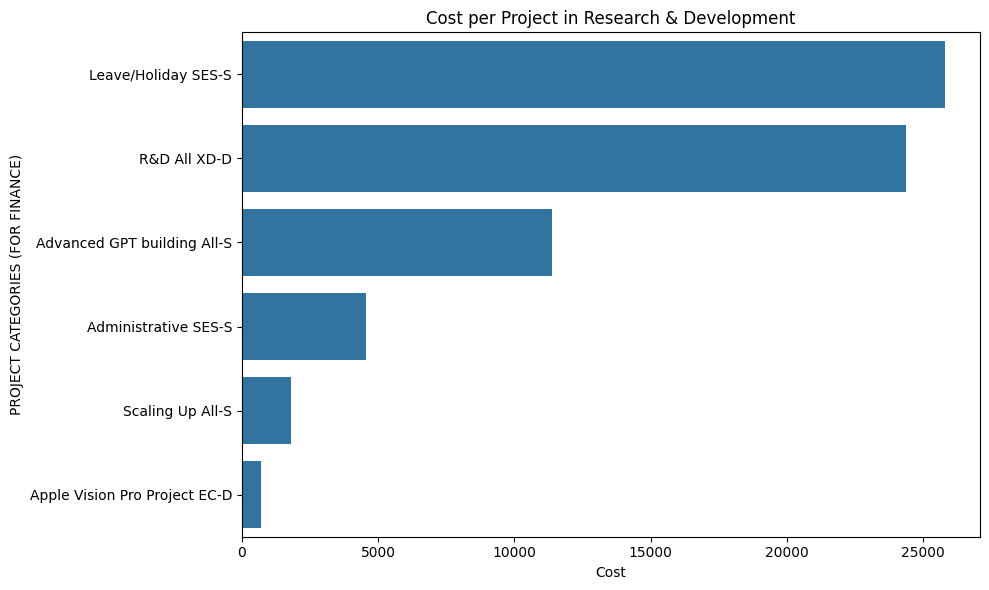

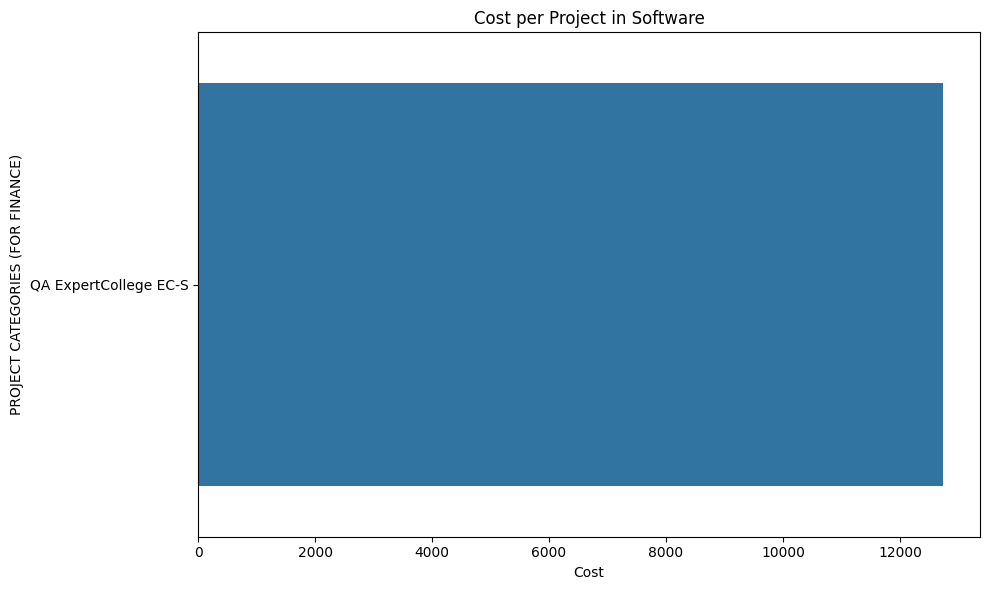

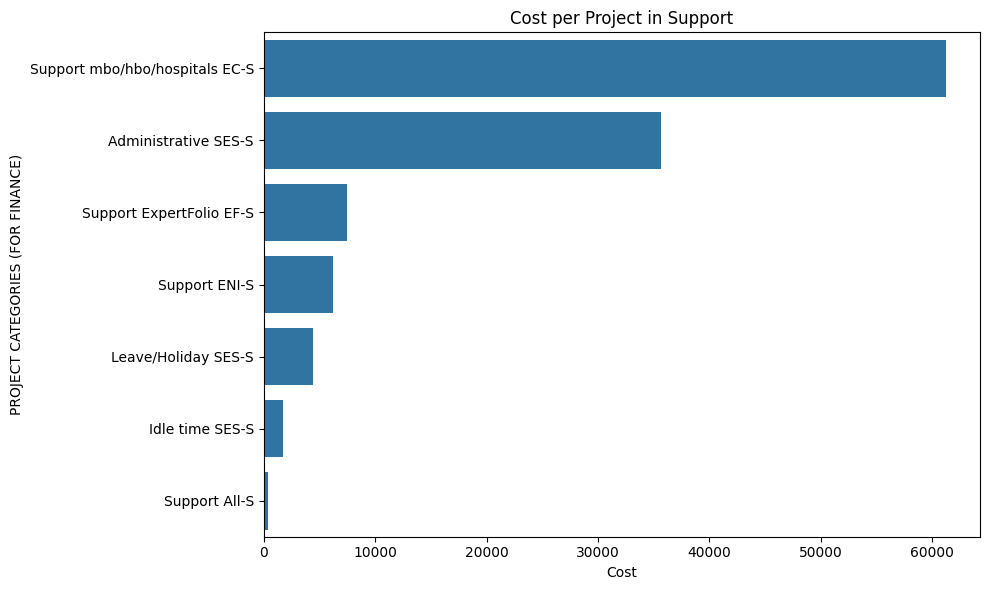

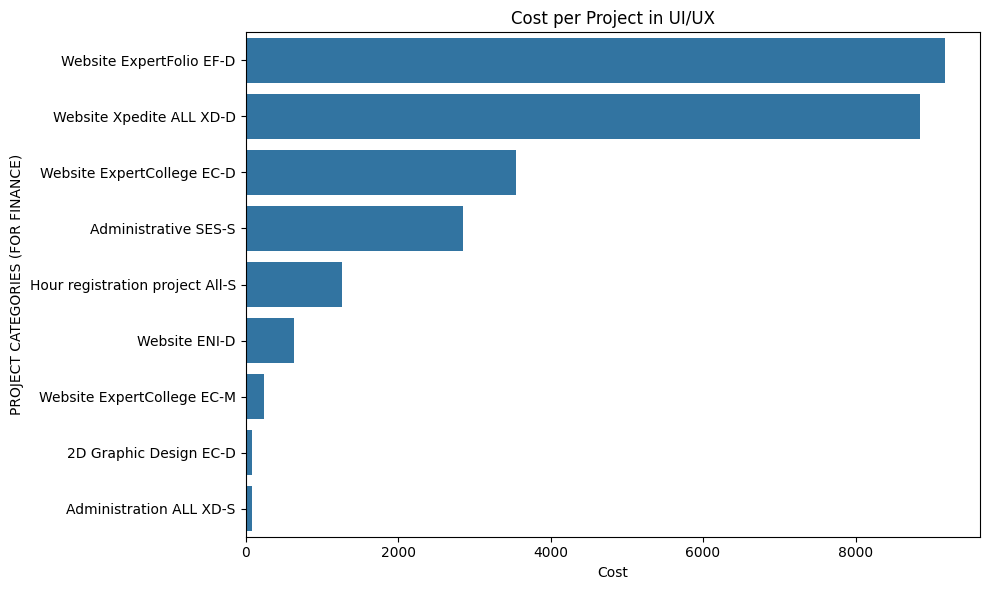

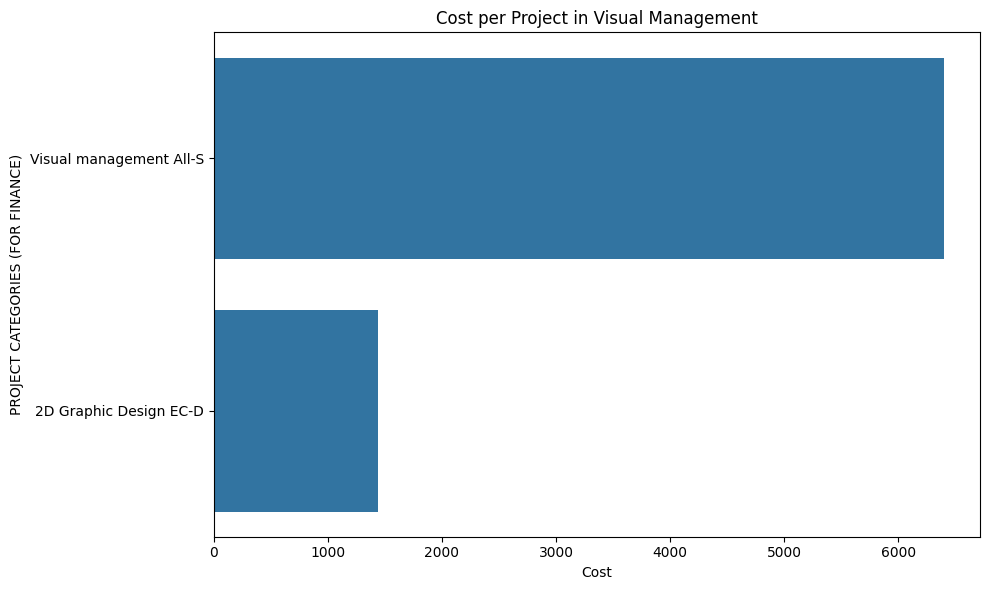

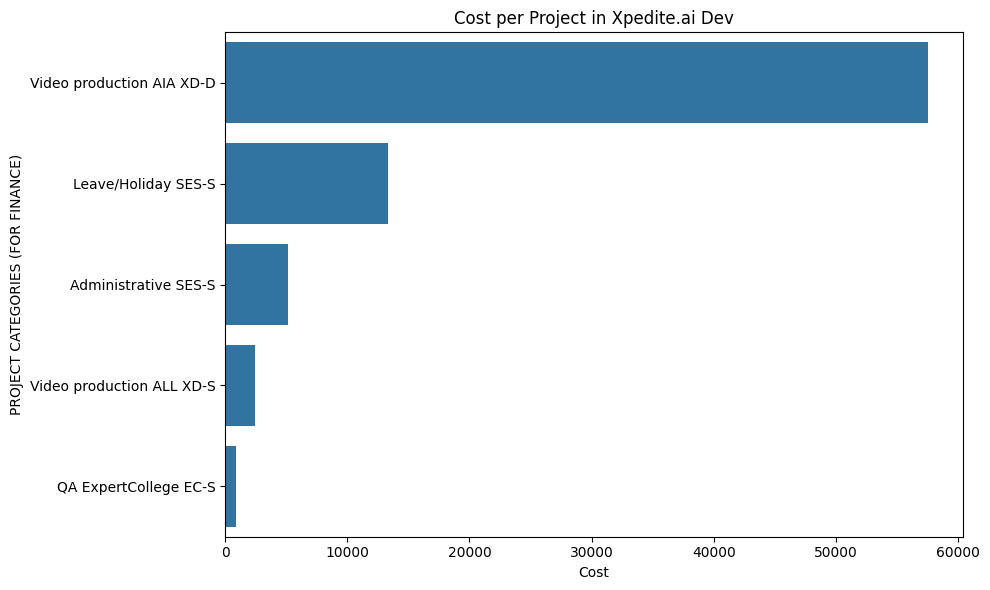

In [42]:
# PER DEPARTMENT
# If we select a department, 

projectCostPerDepartment = taskCostData.groupby(['Space Name', 'PROJECT CATEGORIES (FOR FINANCE)'])['Cost per Task'].sum().reset_index()
projectCostPerDepartment = projectCostPerDepartment.sort_values(by=['Space Name', 'Cost per Task'], ascending=[True, False])
spaces = projectCostPerDepartment['Space Name'].unique()

for space in spaces: 
    space_data = projectCostPerDepartment[projectCostPerDepartment['Space Name'] == space]
    print(space_data)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=space_data, x='Cost per Task', y='PROJECT CATEGORIES (FOR FINANCE)')
    plt.title(f'Cost per Project in {space}')
    plt.xlabel('Cost')
    plt.ylabel('PROJECT CATEGORIES (FOR FINANCE)')
    plt.tight_layout()
    
    # Show the plot
    plt.show()